In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import pandas as pd
from joblib import load
from sklearn.model_selection import train_test_split
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("whitegrid")
plt.rc('font', size=12)

In [22]:
df_data = pd.read_csv("../../results/processed_dataset/4_data_transform.csv")
df_data

,Age,Weight,Height,Glycemia,SBP,DBP,Cholesterol,Triglycerides,HDL,LDL,BMI,response
0,0.684211,0.426087,0.865169,0.874194,0.700000,0.535354,0.880309,0.272358,0.802395,0.798810,0.443255,1
1,0.473684,0.495652,0.915730,0.655914,0.857143,0.808081,0.768340,0.443089,0.479042,0.761905,0.460385,1
2,0.631579,0.808696,0.983146,0.881720,0.785714,0.707071,0.555985,0.276423,0.678643,0.369048,0.650964,0
3,0.842105,0.521739,0.870787,0.860215,0.857143,0.707071,0.930502,0.418699,0.668663,0.779762,0.535332,1
4,0.500000,0.521739,0.870787,0.741935,0.857143,0.656566,0.633205,0.325203,0.429142,0.625000,0.535332,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.842105,0.513043,0.859551,0.853763,0.850000,0.787879,0.741313,0.443089,0.703593,0.593452,0.539615,1
73,0.973684,0.521739,0.955056,0.874194,0.742857,0.545455,0.745174,0.540650,0.602794,0.630952,0.445396,1
74,0.868421,0.426087,0.842697,0.677419,0.857143,0.606061,0.806950,0.475610,0.409182,0.857143,0.466809,1
75,0.736842,0.434783,0.882022,0.858065,0.721429,0.484848,0.637066,0.333333,0.495010,0.589286,0.434690,0


In [23]:
responses = df_data["response"].values
df_data = df_data.drop(columns=["response"])

train_data, validation_data, train_response, validation_response = train_test_split(df_data, responses, random_state=849, test_size=.20)


In [24]:
model = load("../../results/training_models/clf_ridge.joblib")

In [25]:
explainer = shap.Explainer(model, train_data)
shap_values = explainer(validation_data)

In [26]:
shap.summary_plot(shap_values, validation_data, plot_type="bar", show=False)
plt.savefig("../../results/explain_results/relevance_features.png", dpi=300)
plt.clf()

<Figure size 800x590 with 0 Axes>

In [27]:
shap.summary_plot(shap_values, validation_data, show=False)
plt.savefig("../../results/explain_results/summary_plot.png", dpi=300)
plt.clf()

<Figure size 800x590 with 0 Axes>

In [28]:
validation_response

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

### Positive examples

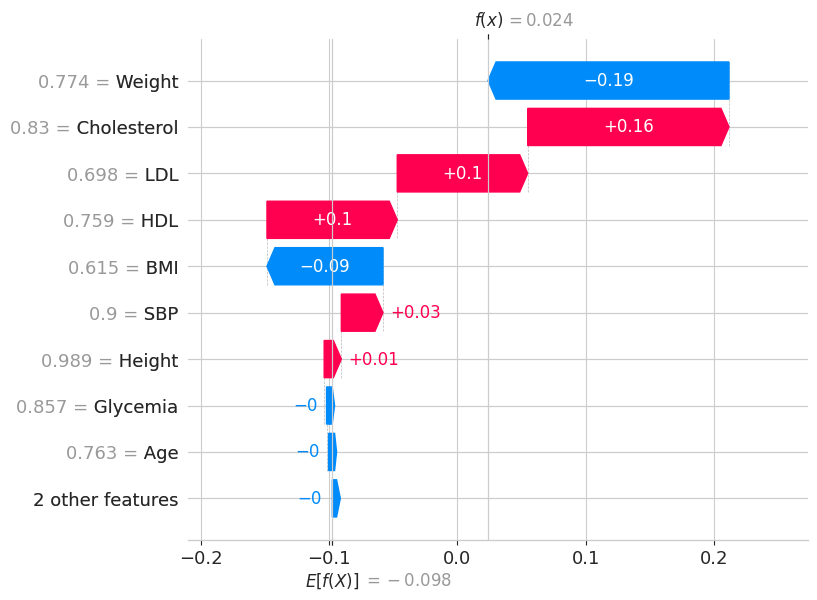

<Figure size 640x480 with 0 Axes>

In [29]:
shap.plots.waterfall(shap_values[0])
plt.savefig("../../results/explain_results/waterfall_query_0.png", dpi=300)
plt.clf()

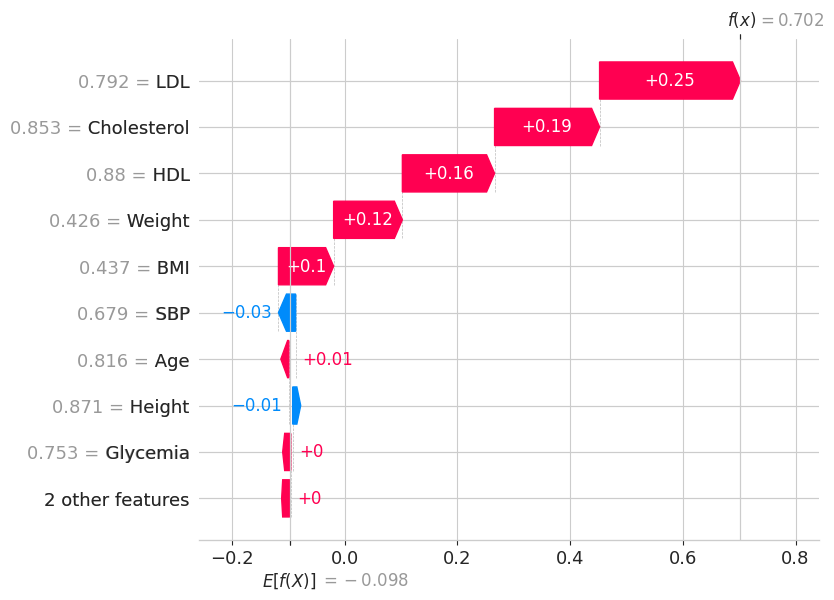

<Figure size 640x480 with 0 Axes>

In [30]:
shap.plots.waterfall(shap_values[1])
plt.savefig("../../results/explain_results/waterfall_query_1.png", dpi=300)
plt.clf()

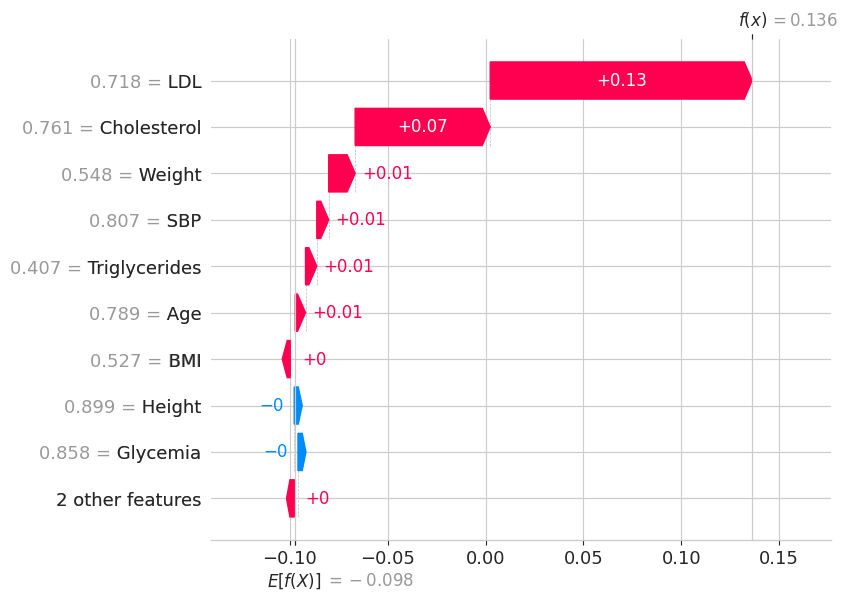

<Figure size 640x480 with 0 Axes>

In [31]:
shap.plots.waterfall(shap_values[2])
plt.savefig("../../results/explain_results/waterfall_query_2.png", dpi=300)
plt.clf()

### Negative examples

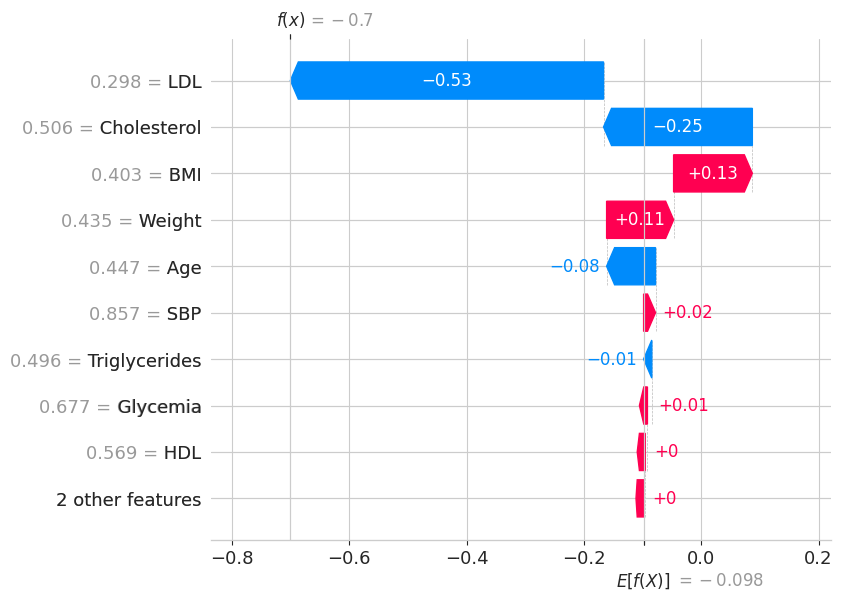

<Figure size 640x480 with 0 Axes>

In [32]:
shap.plots.waterfall(shap_values[3])
plt.savefig("../../results/explain_results/waterfall_query_3.png", dpi=300)
plt.clf()

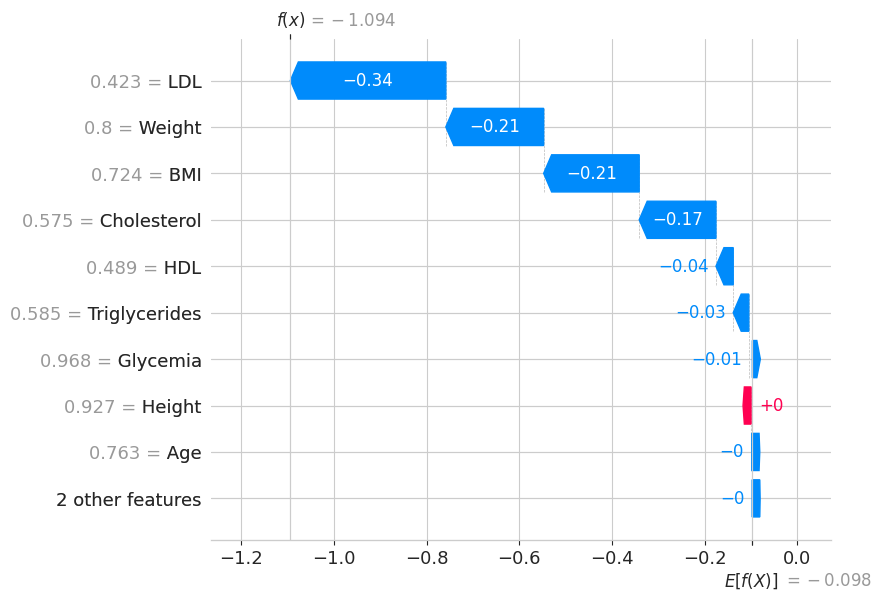

<Figure size 640x480 with 0 Axes>

In [33]:
shap.plots.waterfall(shap_values[4])
plt.savefig("../../results/explain_results/waterfall_query_4.png", dpi=300)
plt.clf()

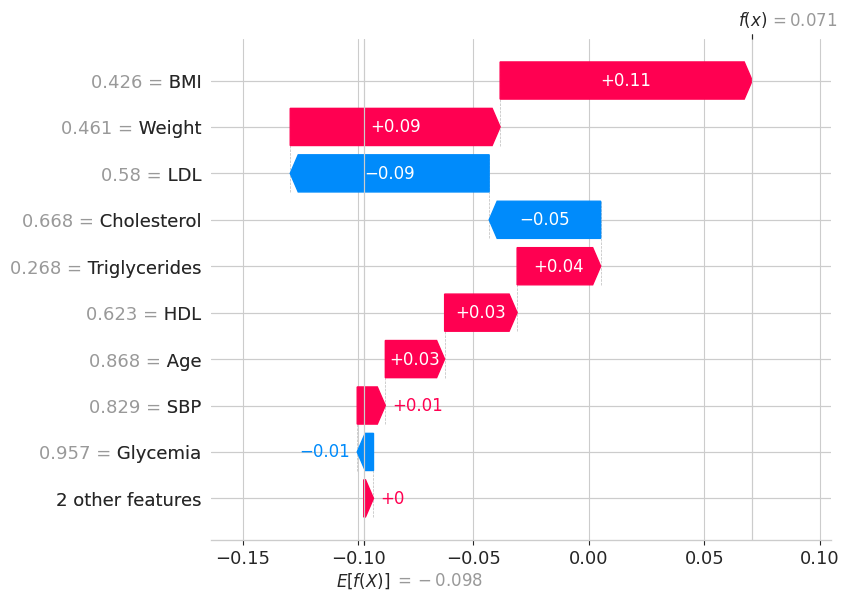

<Figure size 640x480 with 0 Axes>

In [34]:
shap.plots.waterfall(shap_values[5])
plt.savefig("../../results/explain_results/waterfall_query_5.png", dpi=300)
plt.clf()

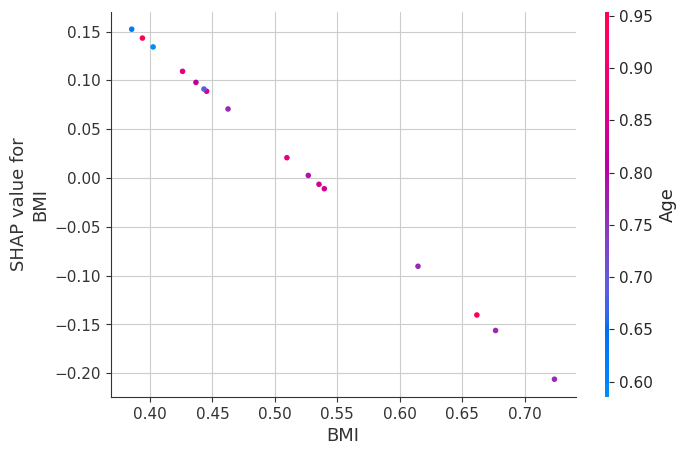

<Figure size 640x480 with 0 Axes>

In [35]:
shap.dependence_plot("BMI", shap_values.values, validation_data)
plt.savefig("../../results/explain_results/BMI_dependencies.png", dpi=300)
plt.clf()

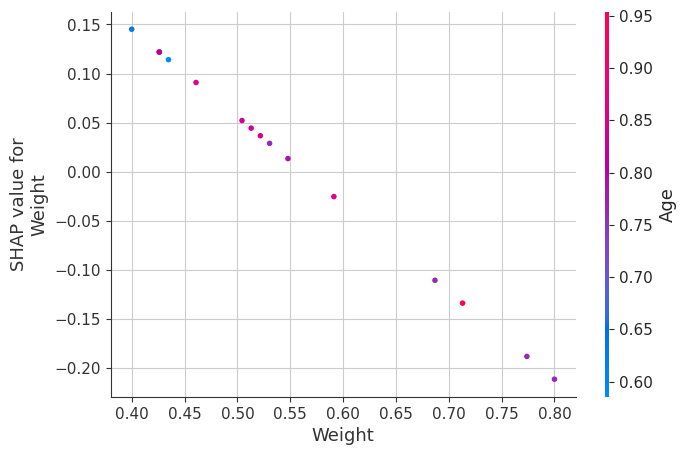

<Figure size 640x480 with 0 Axes>

In [36]:
shap.dependence_plot("Weight", shap_values.values, validation_data)
plt.savefig("../../results/explain_results/Weight_dependencies.png", dpi=300)
plt.clf()

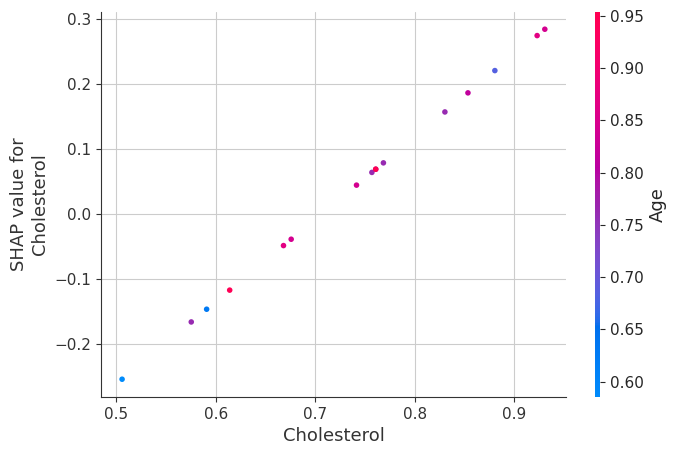

<Figure size 640x480 with 0 Axes>

In [37]:
shap.dependence_plot("Cholesterol", shap_values.values, validation_data)
plt.savefig("../../results/explain_results/Cholesterol_dependencies.png", dpi=300)
plt.clf()

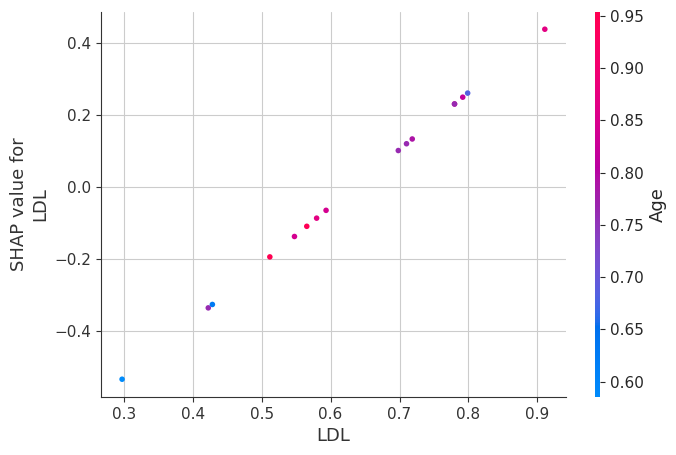

<Figure size 640x480 with 0 Axes>

In [38]:
shap.dependence_plot("LDL", shap_values.values, validation_data)
plt.savefig("../../results/explain_results/LDL_dependencies.png", dpi=300)
plt.clf()